In [23]:
import numpy as np
import matplotlib.pyplot as plt
random_data = np.load('output/random_gym.npy')
targeted_data = np.load('output/heuristic_gym.npy')
rl_data_single = np.load('output/single_attack_gym_p05.npy')
rl_data_pairs = np.load('output/pairs_attack_gym_p05.npy')
rl_data_triples = np.load('output/triplet_attack_gym_p05.npy')

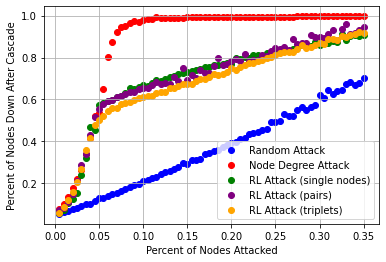

In [27]:
plt.scatter(random_data[0],random_data[1],color='b')
plt.scatter(targeted_data[0],targeted_data[1],color='r')
plt.scatter(rl_data_single[0],rl_data_single[1],color='g')
plt.scatter(rl_data_pairs[0],rl_data_pairs[1],color='purple')
plt.scatter(rl_data_triples[0],rl_data_triples[1],color='orange')
plt.ylabel('Percent of Nodes Down After Cascade')
plt.xlabel('Percent of Nodes Attacked')
plt.legend(['Random Attack','Node Degree Attack','RL Attack (single nodes)','RL Attack (pairs)','RL Attack (triplets)'])
plt.grid()

In [16]:
print(random_data[1][-10])

0.1283759966428871


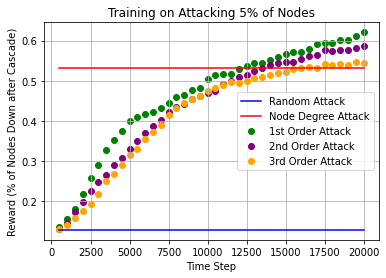

In [28]:
import json
single_json = 'output/run-PPO_p05_single_1-tag-rollout_ep_rew_mean.json'
pair_json = 'output/run-PPO_p05_pairs_2-tag-rollout_ep_rew_mean.json'
triple_json = 'output/run-PPO_p05_triplets_2-tag-rollout_ep_rew_mean.json'
with open(single_json) as f:
    out = json.load(f)
    steps_single = [l[1] for l in out]
    rewards_single = [l[2] for l in out]
with open(pair_json) as f:
    out = json.load(f)
    steps_pair = [l[1] for l in out]
    rewards_pair = [l[2] for l in out]
with open(triple_json) as f:
    out = json.load(f)
    steps_triple = [l[1] for l in out]
    rewards_triple = [l[2] for l in out]
plt.scatter(steps_single,rewards_single,color='g')
plt.scatter(steps_pair,rewards_pair,color='purple')
plt.scatter(steps_triple,rewards_triple,color='orange')
plt.plot(steps_single,0.128*np.ones(len(steps_single)),color='blue')
plt.plot(steps_single,0.533*np.ones(len(steps_single)),color='red')
plt.title('Training on Attacking 5% of Nodes')
plt.ylabel('Reward (% of Nodes Down after Cascade)')
plt.xlabel('Time Step')
plt.legend(['Random Attack','Node Degree Attack','1st Order Attack','2nd Order Attack','3rd Order Attack'])
plt.grid()